In [1]:
using Posets
using DelimitedFiles
using Plots
using Combinatorics

In [88]:
function equivalencias(propiedades)
    numnodos, numpropo = propiedades |> size
    listasimilaridades::Array{Array{Int,1},1} = [Int[] for _ in 1:numnodos]
    for i in 1:numnodos
        for j in 1:numnodos
            if norm( sort(propiedades[i,:] )- sort(propiedades[j,:] )) < 10^(-5)
                push!(listasimilaridades[i], j)
            end
        end
    end
    unique(sort.(listasimilaridades))
end

equivalencias (generic function with 1 method)

# Método $m^2$ y $m^3$

 Abajo se introducen los rankings de Universidades con 10 nodos.

In [4]:
?readdlm

search: readdlm readdir



```
readdlm(source, T::Type; options...)
```

The columns are assumed to be separated by one or more whitespaces. The end of line delimiter is taken as `\n`.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = [5; 6; 7; 8];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y])
       end;

julia> readdlm("delim_file.txt", Int64)
4×2 Array{Int64,2}:
 1  5
 2  6
 3  7
 4  8

julia> readdlm("delim_file.txt", Float64)
4×2 Array{Float64,2}:
 1.0  5.0
 2.0  6.0
 3.0  7.0
 4.0  8.0

julia> rm("delim_file.txt")
```

---

```
readdlm(source, delim::AbstractChar, T::Type; options...)
```

The end of line delimiter is taken as `\n`.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = [1.1; 2.2; 3.3; 4.4];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y], ',')
       end;

julia> readdlm("delim_file.txt", ',', Float64)
4×2 Array{Float64,2}:
 1.0  1.1
 2.0  2.2
 3.0  3.3
 4.0  4.4

julia> rm("delim_file.txt")
```

---

```
readdlm(source; options...)
```

The columns are assumed to be separated by one or more whitespaces. The end of line delimiter is taken as `\n`. If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a heterogeneous array of numbers and strings is returned.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = ["a"; "b"; "c"; "d"];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y])
       end;

julia> readdlm("delim_file.txt")
4×2 Array{Any,2}:
 1  "a"
 2  "b"
 3  "c"
 4  "d"

julia> rm("delim_file.txt")
```

---

```
readdlm(source, delim::AbstractChar; options...)
```

The end of line delimiter is taken as `\n`. If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a heterogeneous array of numbers and strings is returned.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = [1.1; 2.2; 3.3; 4.4];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y], ',')
       end;

julia> readdlm("delim_file.txt", ',')
4×2 Array{Float64,2}:
 1.0  1.1
 2.0  2.2
 3.0  3.3
 4.0  4.4

julia> z = ["a"; "b"; "c"; "d"];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x z], ',')
       end;

julia> readdlm("delim_file.txt", ',')
4×2 Array{Any,2}:
 1  "a"
 2  "b"
 3  "c"
 4  "d"

julia> rm("delim_file.txt")
```

---

```
readdlm(source, delim::AbstractChar, eol::AbstractChar; options...)
```

If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a heterogeneous array of numbers and strings is returned.

---

```
readdlm(source, delim::AbstractChar, T::Type, eol::AbstractChar; header=false, skipstart=0, skipblanks=true, use_mmap, quotes=true, dims, comments=false, comment_char='#')
```

Read a matrix from the source where each line (separated by `eol`) gives one row, with elements separated by the given delimiter. The source can be a text file, stream or byte array. Memory mapped files can be used by passing the byte array representation of the mapped segment as source.

If `T` is a numeric type, the result is an array of that type, with any non-numeric elements as `NaN` for floating-point types, or zero. Other useful values of `T` include `String`, `AbstractString`, and `Any`.

If `header` is `true`, the first row of data will be read as header and the tuple `(data_cells, header_cells)` is returned instead of only `data_cells`.

Specifying `skipstart` will ignore the corresponding number of initial lines from the input.

If `skipblanks` is `true`, blank lines in the input will be ignored.

If `use_mmap` is `true`, the file specified by `source` is memory mapped for potential speedups. Default is `true` except on Windows. On Windows, you may want to specify `true` if the file is large, and is only read once and not written to.

If `quotes` is `true`, columns enclosed within double-quote (") characters are allowed to contain new lines and column delimiters. Double-quote characters within a quoted field must be escaped with another double-quote.  Specifying `dims` as a tuple of the expected rows and columns (including header, if any) may speed up reading of large files.  If `comments` is `true`, lines beginning with `comment_char` and text following `comment_char` in any line are ignored.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = [5; 6; 7; 8];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y])
       end

julia> readdlm("delim_file.txt", '\t', Int, '\n')
4×2 Array{Int64,2}:
 1  5
 2  6
 3  7
 4  8

julia> rm("delim_file.txt")
```


In [5]:
data20 = readdlm("/home/david/toometatoofast/curiosidades/ivan/paquete-julia/lista-ejemplo-univ-20.csv",',',Int)

14×20 Array{Int64,2}:
 4   7   1  11  15  5   6  20  17   2  16   3  14  13  12  19   8  18   9  10
 4   7  15  11   5  1   6  17   2  16  20   3  13   9  18  12  14  19   8  10
 4  15   7  11   5  1   2   6  16  17  20   3  13  12  18  19  14   9   8  10
 4  15   7  11   5  1   2   6  16  17  20   3  13  12  18  19  14   9   8  10
 4   7  11  15   5  1   2   6  16  17  20   3  12  13  18  19  14   9   8  10
 4   7  11  15   5  1   2   6  16  17  20   3  12  13  18  19  14   9  10   8
 4   7  11  15   5  1   2   6  16  17  20   3  12  13  18  19  14   9  10   8
 4  11   7   5  15  1   6   2  16  17  20   3  12  13  18  19  14   9  10   8
 4   7   5  11  15  1   6   2  16  17  20  12   3  18  13  19  14  10   9   8
 4   7   5  11  15  1   6   2  16  17  20  12   3  18  13  19  14   9  10   8
 4   7  11   5  15  1   6   2  16  17  20  12   3  13  18  19  14   9  10   8
 4   7   5  11  15  6   1   2  16  17  20  12   3  13  19  18  14  10   9   8
 4   7   5  11  15  6   1   2  16  17  20 

In [9]:
lista = Array{Int,1}[]
for i in 1:14
    push!(lista, data20[1,:] )
end

In [73]:
rankingsuniversidades_10nodos=
[
[3,7,6,8,1,4,5,2,9,10],
[3,7,6,4,8,1,5,9,2,10],
[3,7,6,8,4,1,5,2,9,10],
[7,3,6,8,4,1,5,2,10,9],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,4,8,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10]
];

In [7]:
typeof(rankingsuniversidades_10nodos)

Array{Array{Int64,1},1}

Se calcula el poset $m^2$, i.e., el poset con $\max$ y $\min$.

__Nota__ el _keyword_ `alter` se refiere a utilizar el valor lineal. Si se usa `false` en substitución de `true` se usa el inverso $1/\mathrm{pos}$.

La funcion `m^2` devuelve las _puntuaciones_ del nodo. Se muestran de acuerdo en la posicion que aparecen.

In [11]:
 m²(lista; alter=true)

20×2 Array{Float64,2}:
 17.0  17.0
 10.0  10.0
  8.0   8.0
 19.0  19.0
 14.0  14.0
 13.0  13.0
 18.0  18.0
  3.0   3.0
  1.0   1.0
  0.0   0.0
 16.0  16.0
  5.0   5.0
  6.0   6.0
  7.0   7.0
 15.0  15.0
  9.0   9.0
 11.0  11.0
  2.0   2.0
  4.0   4.0
 12.0  12.0

In [12]:
poset_m² = m²(lista; alter=true) |> pareja_matrizadyacencia;

Grafico el poset tal cual se obtiene del método en el texto:

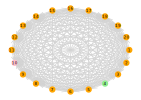

In [13]:
poset_m² |> graficacolor

Ahora grafico la _reducción transitiva_ del poset anterior

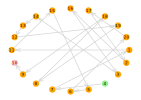

In [14]:
poset_m² |>  reduccion_transitiva|>graficacolor

Se calculan las correlaciones de Pearson entre extensiones lineales ---seleccionadas uniformemente--- de poset $m^2$
y los rankings de las universidades.

In [7]:
listacorrelaciones2 = Float64[]

for i in 1:5000
    linext_aleatoria_inter =  poset_m² |> x->caminatale(x, 200)
    listacorrelaciones2 = [listacorrelaciones2..., [pearson(linext_aleatoria_inter, rankingsuniversidades_10nodos[i]) for i in 1:14]... ]
end

Se hace un histograma de las correlaciones. Se aprecian valores muy altos.

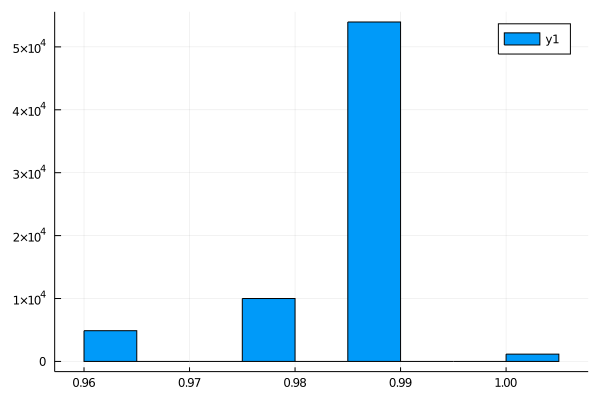

In [8]:
histogram(listacorrelaciones2, bins = 10)

A continuación, se hace el mismo análisis pero utilizando el poset $m^3$, i.e., no sólo se utiliza el máximo y mínimo sino que adcionalmente se usa la mediana.

In [15]:
poset_m³ = m³(lista; alter=true) |> pareja_matrizadyacencia;

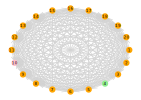

In [16]:
poset_m³ |> graficacolor

Ahora grafico la _reducción transitiva_ del poset anterior

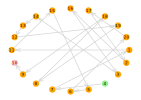

In [17]:
poset_m³ |>  reduccion_transitiva|>graficacolor

Aunque por desgracia no es perceptible rapidamente, no toma mucho tiempo en notar que se trata de un ranking.

In [12]:
listacorrelaciones2 = Float64[]

for i in 1:5000
    linext_aleatoria_inter =  poset_m³ |> x->caminatale(x, 200)
    listacorrelaciones2 = [listacorrelaciones2..., [pearson(linext_aleatoria_inter, rankingsuniversidades_10nodos[i]) for i in 1:14]... ]
end

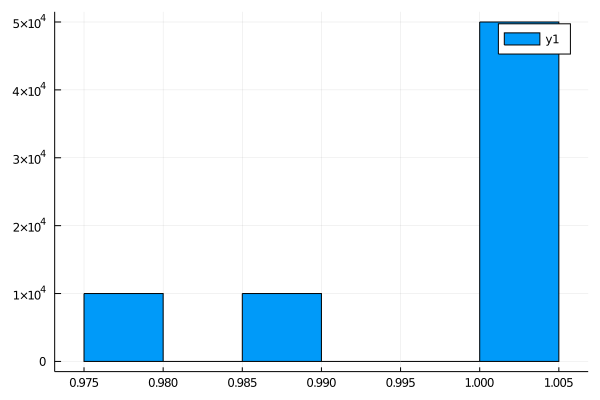

In [13]:
histogram(listacorrelaciones2, bins = 10)

## Adendum

Se revisita el concepto de _fuzzy_ poset.

Usar los valores de la posicion $1/\mathrm{pos}$ para construir la siguiente tabla
$$
\begin{array}{c|ccccc} 
& 1 & \ldots & i & \ldots & n \\
\hline \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\mathbf{x} & p_{1}(x) & \ldots & p_{i}(x) & \ldots & p_{n}(x) \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots
\end{array}
$$

En donde $p_i(x)$ es la puntuacion del nodo $x$ en el ranking $i$-esimo.
Despues se puede hacer un corte $\beta$ y calcular un _fuzzy_ poset con la siguiente expresion

$$
\mathrm{SH}(\tilde x, \tilde y) =
\left\{\begin{array}{ll}
\frac{\sum_{i} \min \left\{p_{i}(x), p_{i}(y)\right\}}{\sum_{i} p_{i}(x)} & \text { if } \sum_{i} p_{i}(x) \neq 0 \\
1 & \text { otherwise }
\end{array}\right.
$$

El FP por defecto considera las frecuencias de aparicion de cada ranking.

In [14]:
function fuzzy(p)
    n,m = size(p)
    matfuzzy = zeros(Float64, n,n)
    for i in 1:n, j in 1:n
        matfuzzy[i,j] = sum([min(p[i,k], p[j,k]) for k in 1:m])/sum([p[i,k] for k in 1:m])
    end
    matfuzzy
end

fuzzy (generic function with 1 method)

In [121]:
poset_mn = mn(lista)# |> pareja_matrizadyacencia;

In [122]:
poset_mn

20×14 Array{Float64,2}:
 0.333333   0.333333   0.333333   …  0.333333   0.333333   0.333333
 0.1        0.1        0.1           0.1        0.1        0.1
 0.0833333  0.0833333  0.0833333     0.0833333  0.0833333  0.0833333
 1.0        1.0        1.0           1.0        1.0        1.0
 0.166667   0.166667   0.166667      0.166667   0.166667   0.166667
 0.142857   0.142857   0.142857   …  0.142857   0.142857   0.142857
 0.5        0.5        0.5           0.5        0.5        0.5
 0.0588235  0.0588235  0.0588235     0.0588235  0.0588235  0.0588235
 0.0526316  0.0526316  0.0526316     0.0526316  0.0526316  0.0526316
 0.05       0.05       0.05          0.05       0.05       0.05
 0.25       0.25       0.25       …  0.25       0.25       0.25
 0.0666667  0.0666667  0.0666667     0.0666667  0.0666667  0.0666667
 0.0714286  0.0714286  0.0714286     0.0714286  0.0714286  0.0714286
 0.0769231  0.0769231  0.0769231     0.0769231  0.0769231  0.0769231
 0.2        0.2        0.2           0.2 

In [19]:
using LinearAlgebra

In [17]:
function pasositerador(mat,iter)
    mati = copy(mat)
    for _ in 1:iter
        matiter = mati |> iteraciontransitiva
        if norm(mati-matiter) < 10^-5
            println("concluyo antes ")
            return matiter
        else
            mati = matiter
        end
    end
    return mati
end

pasositerador (generic function with 1 method)

In [32]:
listasimilaridades = [
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    []
]

20-element Array{Array{Any,1},1}:
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []

In [26]:
tmp1= filter(x -> x>.3, fuzzy(poset_mn))#|> graficacolor

20×20 Array{Float64,2}:
 1.0       0.3  0.0       1.0  0.5       …  0.333333  0.0       0.0     0.375
 1.0       1.0  0.833333  1.0  1.0          1.0       0.555556  0.625   1.0
 1.0       1.0  1.0       1.0  1.0          1.0       0.666667  0.75    1.0
 0.333333  0.0  0.0       1.0  0.0          0.0       0.0       0.0     0.0
 1.0       0.6  0.5       1.0  1.0          0.666667  0.333333  0.375   0.75
 1.0       0.7  0.583333  1.0  1.0       …  0.777778  0.388889  0.4375  0.875
 0.666667  0.0  0.0       1.0  0.333333     0.0       0.0       0.0     0.0
 1.0       1.0  1.0       1.0  1.0          1.0       0.944444  1.0     1.0
 1.0       1.0  1.0       1.0  1.0          1.0       1.0       1.0     1.0
 1.0       1.0  1.0       1.0  1.0          1.0       1.0       1.0     1.0
 1.0       0.4  0.333333  1.0  0.666667  …  0.444444  0.0       0.0     0.5
 1.0       1.0  1.0       1.0  1.0          1.0       0.833333  0.9375  1.0
 1.0       1.0  1.0       1.0  1.0          1.0       0.777

In [33]:
for i in 1:20
    for j in 1:20
        if norm( tmp1[i,:] - tmp1[j,:] ) < 20^(-5)
            push!(listasimilaridades[i], j)
        end
    end
end

Determino las clases de equivalencia

In [34]:
listasimilaridades

20-element Array{Array{Any,1},1}:
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]

In [23]:
tmp1 |> iteraciontransitiva #|> graficacolor

10×10 Array{Float64,2}:
 1.0       0.84507   1.0       0.985915  …  1.0       0.779167  0.733568
 1.0       1.0       1.0       1.0          1.0       0.8896    0.8896
 0.345679  0.345679  1.0       0.382222     0.453333  0.333929  0.302381
 0.813953  0.733568  1.0       1.0          0.965116  0.697674  0.697674
 1.0       0.868056  1.0       1.0          1.0       0.868056  0.8128
 0.696078  0.60562   1.0       0.728571  …  0.728571  0.543605  0.507143
 0.507143  0.453333  0.933333  0.614286     0.622222  0.453333  0.415033
 0.813725  0.696078  1.0       0.813725     1.0       0.658451  0.596244
 1.0       0.991087  1.0       1.0          1.0       1.0       0.898396
 1.0       1.0       1.0       1.0          1.0       0.992126  1.0

In [24]:
tmp1 = tmp1 -diagm([1 for _ in diagind(tmp1)])

10×10 Array{Float64,2}:
 0.0       0.733568  1.0       0.985915  …  1.0       0.658451  0.596244
 1.0       0.0       1.0       1.0          1.0       0.8896    0.8128
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.813953  0.60562   1.0       0.0          0.965116  0.543605  0.492248
 1.0       0.868056  1.0       1.0          1.0       0.779167  0.705556
 0.507143  0.372024  1.0       0.614286  …  0.728571  0.333929  0.302381
 0.315556  0.0       0.933333  0.382222     0.453333  0.0       0.0
 0.696078  0.510621  1.0       0.813725     0.0       0.458333  0.415033
 1.0       0.991087  1.0       1.0          1.0       0.0       0.898396
 1.0       1.0       1.0       1.0          1.0       0.992126  0.0

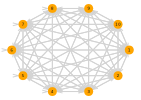

In [25]:
tmp1 |> iteraciontransitiva |> graficacolor

In [26]:
 poset_mn =mn(rankingsuniversidades_10nodos)|> pareja_matrizadyacencia;

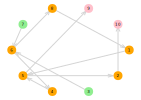

In [27]:
poset_mn |> reduccion_transitiva |> graficacolor

## Otro punto

Estima el grado de pertenencia de un ranking al conjunto de extensiones lineales del FP.


\begin{array}{c|ccccc} 
& 1 & \ldots & i & \ldots & n \\
\hline \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\mathbf{x} & p_{1}(x) & \ldots & p_{i}(x) & \ldots & p_{n}(x) \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots
\end{array}


$$
\mu_{\Lambda(\tilde{P})}(L) =1-\bigvee_{u, v} \mu_{\tilde{P}}(u, v) \wedge\left(1-\mu_{L}(u, v)\right)
$$

In [74]:
 poset_mn =mn(rankingsuniversidades_10nodos) |> fuzzy

10×10 Array{Float64,2}:
 1.0       0.733568  1.0       0.985915  …  1.0       0.658451  0.596244
 1.0       1.0       1.0       1.0          1.0       0.8896    0.8128
 0.175309  0.128601  1.0       0.212346     0.251852  0.115432  0.104527
 0.813953  0.60562   1.0       1.0          0.965116  0.543605  0.492248
 1.0       0.868056  1.0       1.0          1.0       0.779167  0.705556
 0.507143  0.372024  1.0       0.614286  …  0.728571  0.333929  0.302381
 0.315556  0.231481  0.933333  0.382222     0.453333  0.207778  0.188148
 0.696078  0.510621  1.0       0.813725     1.0       0.458333  0.415033
 1.0       0.991087  1.0       1.0          1.0       1.0       0.898396
 1.0       1.0       1.0       1.0          1.0       0.992126  1.0

In [75]:
 tmp1 =mn(rankingsuniversidades_10nodos);

In [69]:
pp = [8, 14, 18, 10, 6, 15, 7, 20, 19, 4, 5, 16, 11, 3, 2, 17, 13, 9, 12, 1];

In [50]:
using Random

In [58]:
randperm(3)

3-element Array{Int64,1}:
 2
 3
 1

In [76]:
[randperm(20) for _ in 1:10] |> countmap

Dict{Array{Int64,1},Int64} with 10 entries:
  [9, 12, 1, 19, 3, 5, 11, 8, 13, 7, 10, 16, 4, 6, 20, 15, 18, 2, 17, 14] => 1
  [1, 5, 9, 11, 8, 7, 17, 2, 15, 6, 13, 19, 16, 14, 10, 20, 4, 3, 12, 18] => 1
  [5, 17, 12, 4, 3, 16, 1, 8, 13, 2, 11, 14, 6, 10, 19, 18, 7, 20, 9, 15] => 1
  [4, 13, 8, 19, 12, 9, 14, 15, 18, 10, 3, 5, 2, 7, 17, 20, 11, 6, 16, 1] => 1
  [8, 6, 9, 5, 1, 14, 13, 11, 2, 19, 12, 20, 17, 15, 4, 7, 3, 10, 16, 18] => 1
  [5, 9, 10, 19, 11, 3, 15, 6, 16, 17, 13, 7, 12, 4, 14, 1, 8, 2, 18, 20] => 1
  [12, 16, 13, 9, 3, 11, 14, 15, 6, 1, 19, 4, 18, 8, 5, 2, 17, 20, 10, 7] => 1
  [5, 6, 18, 2, 13, 4, 10, 11, 19, 9, 15, 20, 12, 8, 14, 3, 7, 17, 1, 16] => 1
  [9, 8, 5, 18, 4, 19, 17, 11, 20, 15, 12, 10, 6, 16, 14, 3, 13, 7, 2, 1] => 1
  [18, 5, 8, 1, 3, 19, 9, 20, 6, 7, 11, 4, 17, 12, 16, 2, 10, 14, 15, 13] => 1

In [81]:
[membresia(randperm(20), poset_mn) for _ in 1:1000000] |> countmap

Dict{Int64,Int64} with 1 entry:
  0 => 1000000

In [79]:
membresia(pp,poset_mn)

0

In [42]:
function membresia(el, mposet)
    n, _ = size(mposet)
    @assert n == length(el)
    or = el |> sortperm
    tope = 0.
    for u in 1:n, v in 1:n
        if u == v
            continue
        end
    #for u in 1:n, v in u+1:n
        este =min(mposet[u,v], 1 - (or[u] < or[v]) )
        #@show este, mposet[u,v]
        if tope < este
            tope = este
        end
        if tope ≈ 1.
            @show u,v
            return 0
        end
    end
    
    1-tope
    #tope
end

membresia (generic function with 1 method)

In [54]:
llrr = [[1,2,3], [1,2,3], [2,1,3], [2,1,3], [2,1,3], [2,1,3], [2,1,3], [2,1,3]]

8-element Array{Array{Int64,1},1}:
 [1, 2, 3]
 [1, 2, 3]
 [2, 1, 3]
 [2, 1, 3]
 [2, 1, 3]
 [2, 1, 3]
 [2, 1, 3]
 [2, 1, 3]

## Fuzzy poset

Se analiza el caso de un poset fuzzy en donde el poset es bien conocido.

In [79]:
llrr = [[1,2,3]#=, [1,2,3]=#, [1,3,2]#=, [2,1,3], [2,1,3], [2,1,3], [2,1,3], [2,1,3]=#]

2-element Array{Array{Int64,1},1}:
 [1, 2, 3]
 [1, 3, 2]

Primero se calculan las puntuaciones de acuerdo con $1/\mathrm{pos}$.

In [95]:
 puntuaciones_preposet =mn(llrr)

3×2 Array{Float64,2}:
 1.0       1.0
 0.5       0.333333
 0.333333  0.5

In [91]:
 puntuaciones_preposet = [
    1. 1.;
    1/4 1/9;
    1/9 1/4
]

3×2 Array{Float64,2}:
 1.0       1.0
 0.25      0.111111
 0.111111  0.25

Contando con las propiedades, se calcula un poset.

In [97]:
function fuzzyx(p)
    n,m = size(p)
    matfuzzy = zeros(Float64, n,n)
    for i in 1:n, j in 1:n
        matfuzzy[i,j] = sum([min(p[i,k], p[j,k]) for k in 1:m])/sum([p[j,k] for k in 1:m])
    end
    matfuzzy
end


fuzzyx (generic function with 1 method)

In [98]:
 poset_mn = puntuaciones_preposet |> fuzzyx

3×3 Array{Float64,2}:
 1.0       1.0  1.0
 0.416667  1.0  0.8
 0.416667  0.8  1.0

In [99]:
equivalencias(puntuaciones_preposet)

2-element Array{Array{Int64,1},1}:
 [1]
 [2, 3]

In [100]:
for p in permutations([1,2,3])
    @show membresia(p, poset_mn), p
end

(membresia(p, poset_mn), p) = (0.19999999999999996, [1, 2, 3])
(membresia(p, poset_mn), p) = (0.19999999999999996, [1, 3, 2])
(u, v) = (1, 2)
(membresia(p, poset_mn), p) = (0, [2, 1, 3])
(u, v) = (1, 2)
(membresia(p, poset_mn), p) = (0, [2, 3, 1])
(u, v) = (1, 3)
(membresia(p, poset_mn), p) = (0, [3, 1, 2])
(u, v) = (1, 2)
(membresia(p, poset_mn), p) = (0, [3, 2, 1])


# Crisp poset

En esta seccion, se compara el valor de la pertenencia de una extension lineal para un poset crisp. Es decir, se verifica que el valor de una extension lineal de un poset dado, tenga una valor $1$ de pertenencia.

In [45]:
crisp = [0 1 1; 0 0 0; 0 0 0]

3×3 Array{Int64,2}:
 0  1  1
 0  0  0
 0  0  0

In [46]:
for p in permutations([1,2,3])
    @show membresia(p, crisp), p
end

(membresia(p, crisp), p) = (1.0, [1, 2, 3])
(membresia(p, crisp), p) = (1.0, [1, 3, 2])
(u, v) = (1, 2)
(membresia(p, crisp), p) = (0, [2, 1, 3])
(u, v) = (1, 2)
(membresia(p, crisp), p) = (0, [2, 3, 1])
(u, v) = (1, 3)
(membresia(p, crisp), p) = (0, [3, 1, 2])
(u, v) = (1, 2)
(membresia(p, crisp), p) = (0, [3, 2, 1])


Aqui __si__ funciona, por lo que se puede entender que el problema son las puntuaciones indicadas.